In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_path = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(data_path)

df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [4]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [7]:
df.describe()
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

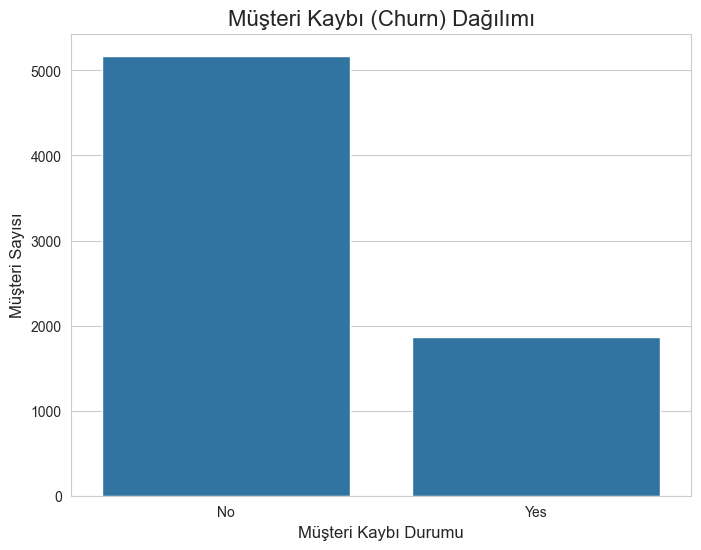

In [8]:
# Grafiğimizin daha estetik görünmesi için seaborn kütüphanesinin stilini ayarlayalım.
sns.set_style("whitegrid")

# Grafiğin boyutunu belirliyoruz (genişlik=8, yükseklik=6 inç). Bu, grafiğin okunaklı olmasını sağlar.
plt.figure(figsize=(8, 6))

# Seaborn kütüphanesinin countplot fonksiyonunu kullanarak 'Churn' sütunundaki değerleri sayan bir çubuk grafik oluşturuyoruz.
sns.countplot(x='Churn', data=df)

# Grafiğimize bir başlık ekliyoruz. Grafiğin ne hakkında olduğunu net bir şekilde belirtmek önemlidir.
plt.title('Müşteri Kaybı (Churn) Dağılımı', fontsize=16)

# X ve Y eksenlerine etiketler ekliyoruz.
plt.xlabel('Müşteri Kaybı Durumu', fontsize=12)
plt.ylabel('Müşteri Sayısı', fontsize=12)

# Hazırladığımız grafiği ekranda gösteriyoruz.
plt.show()

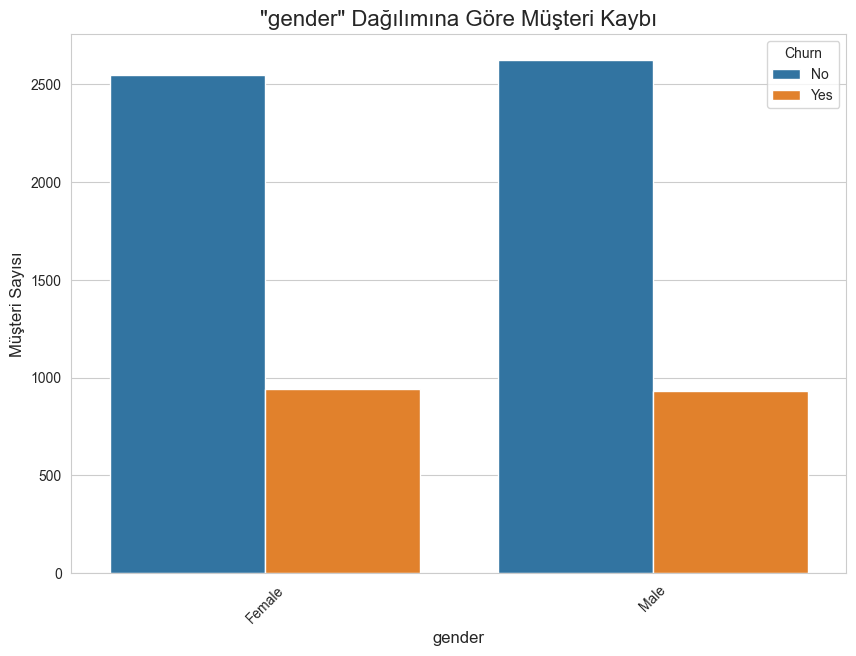

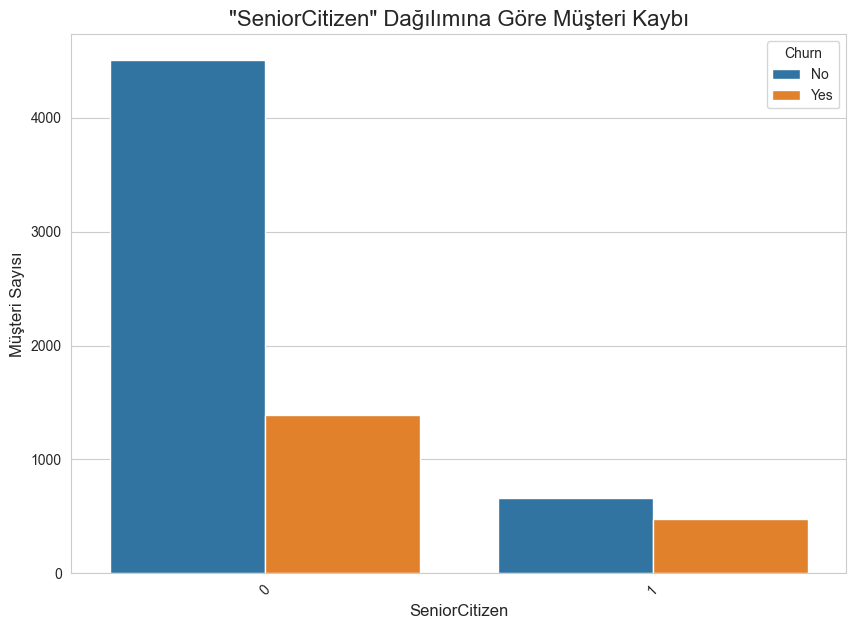

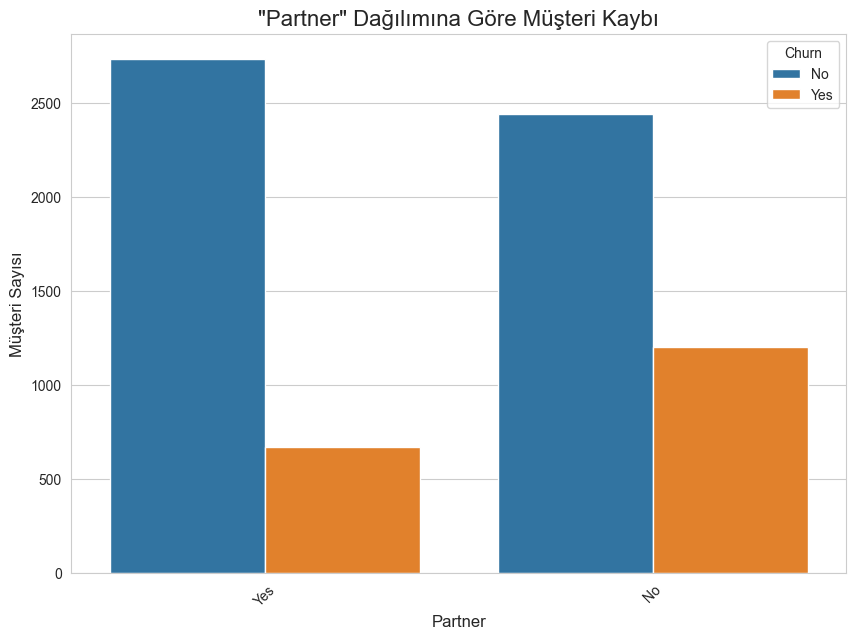

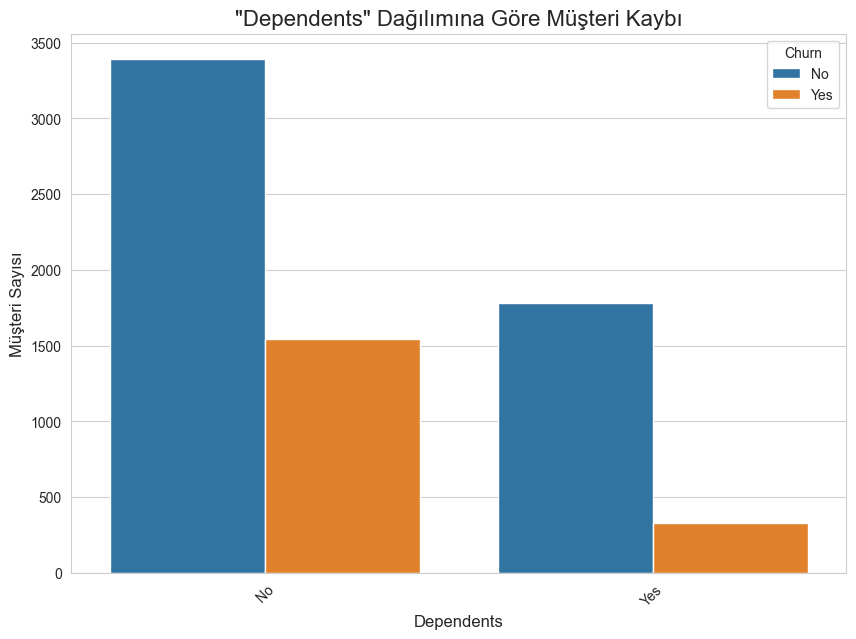

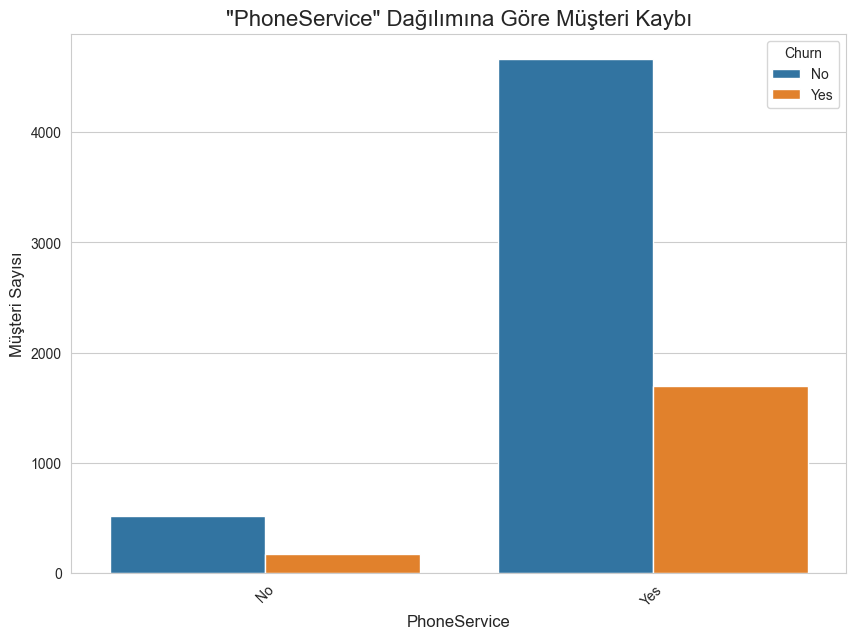

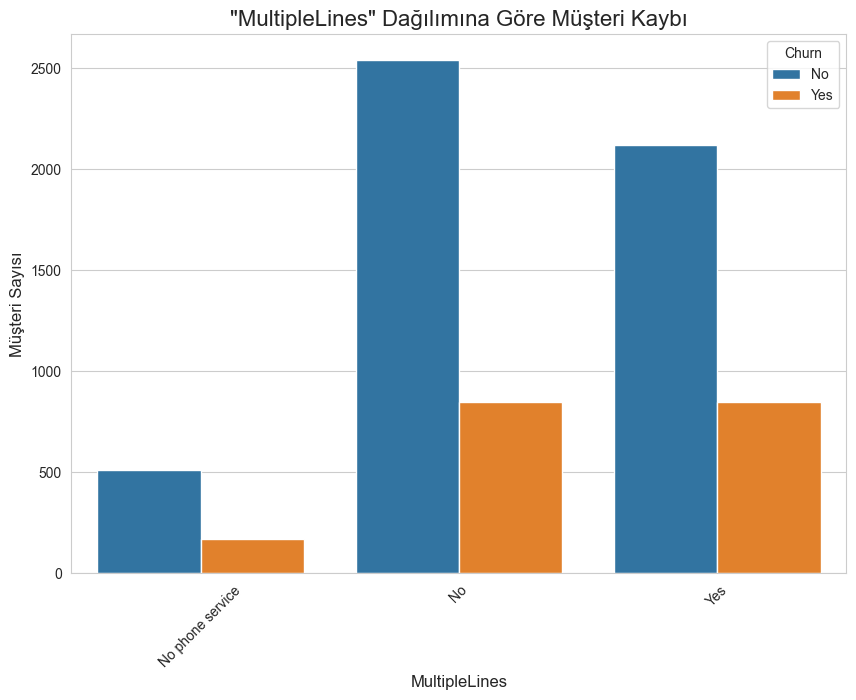

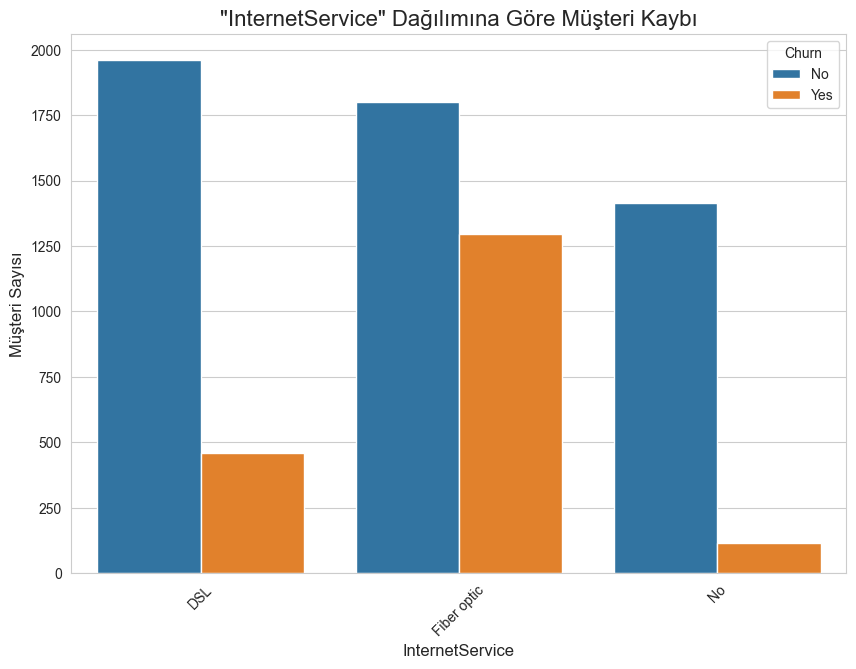

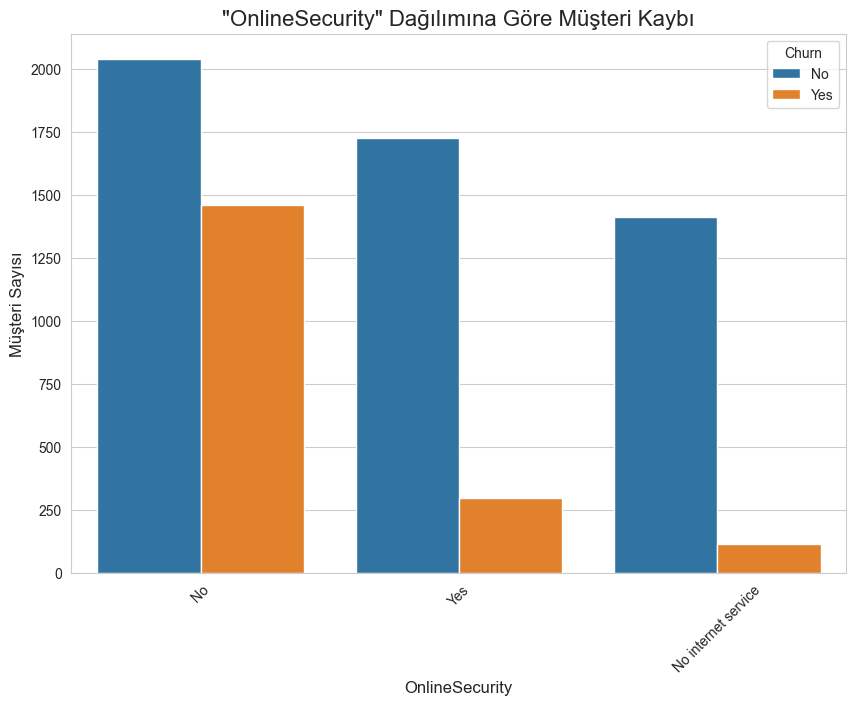

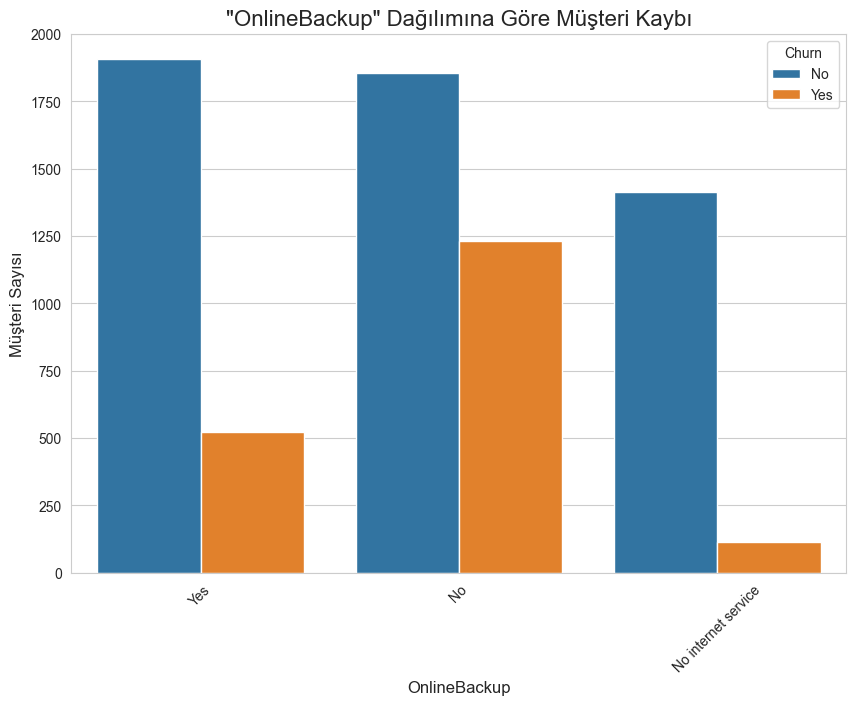

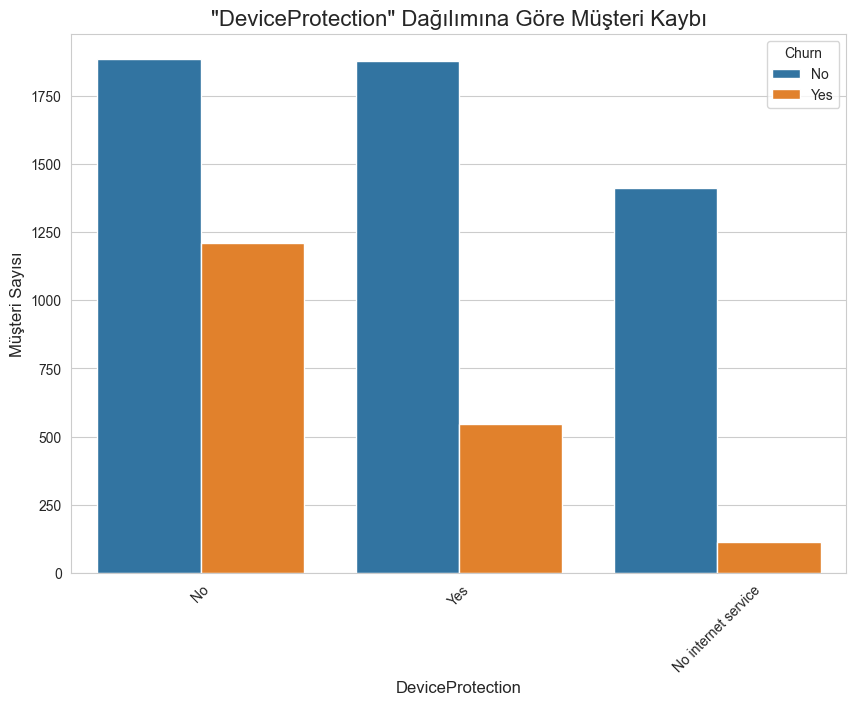

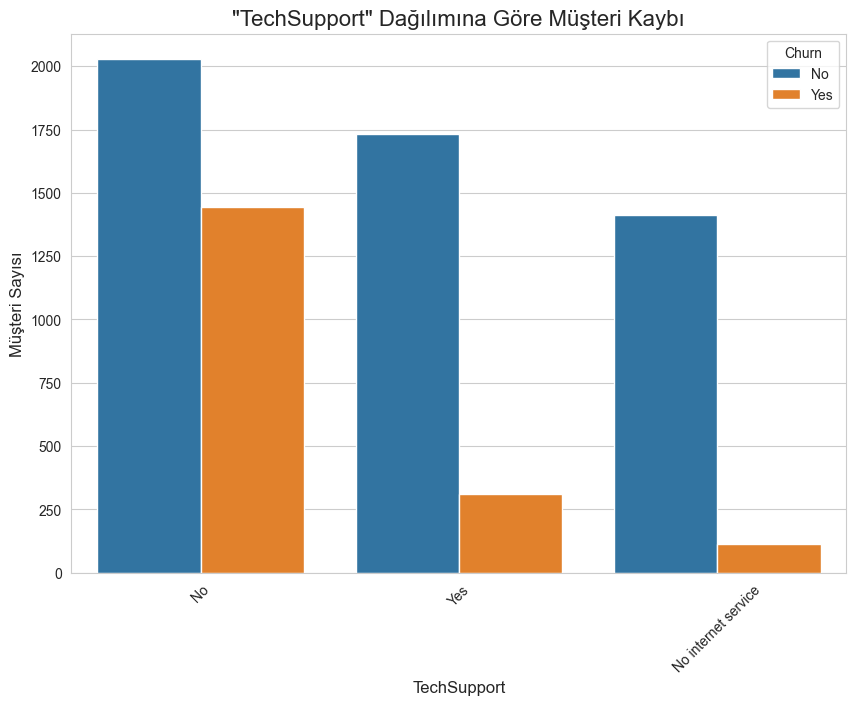

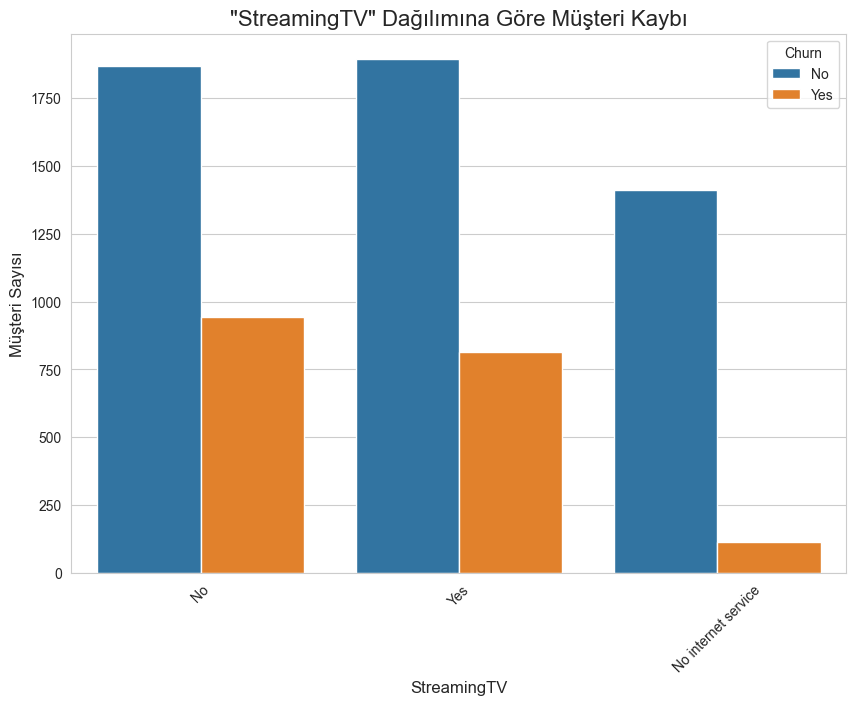

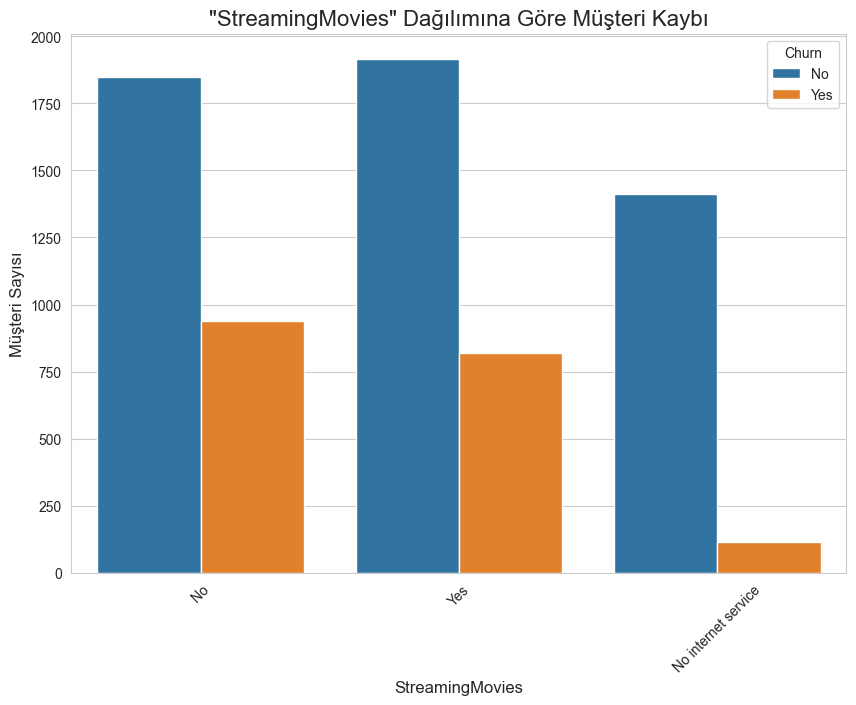

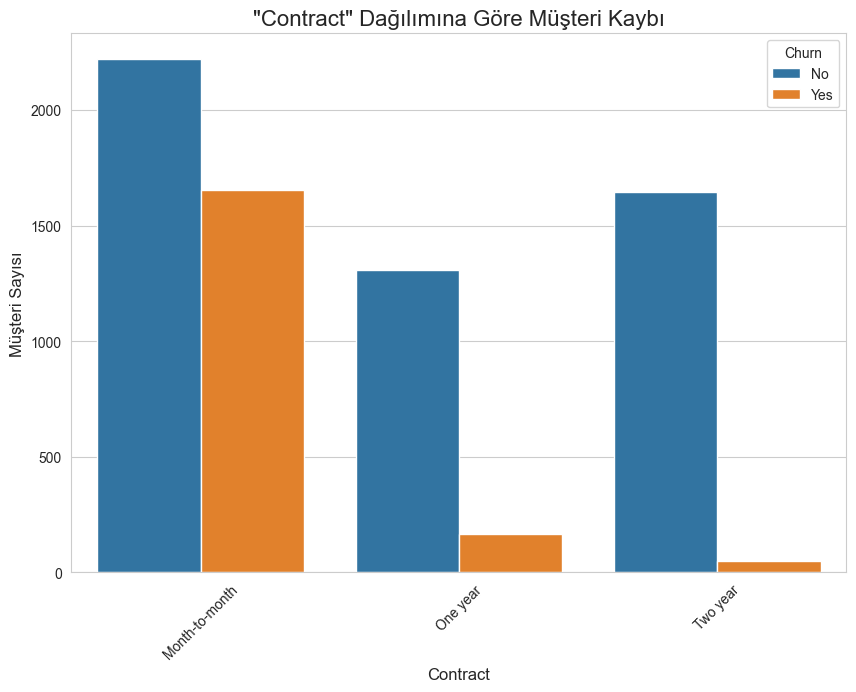

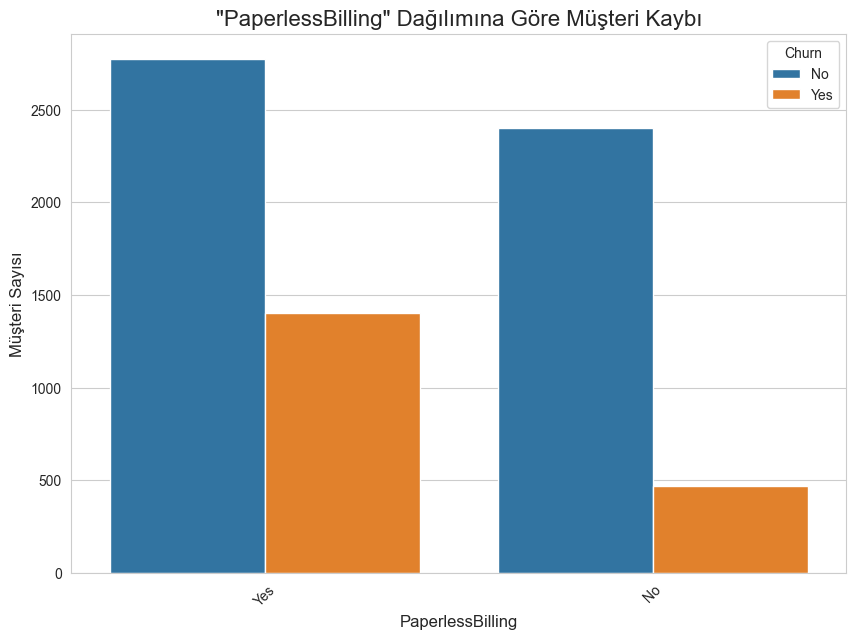

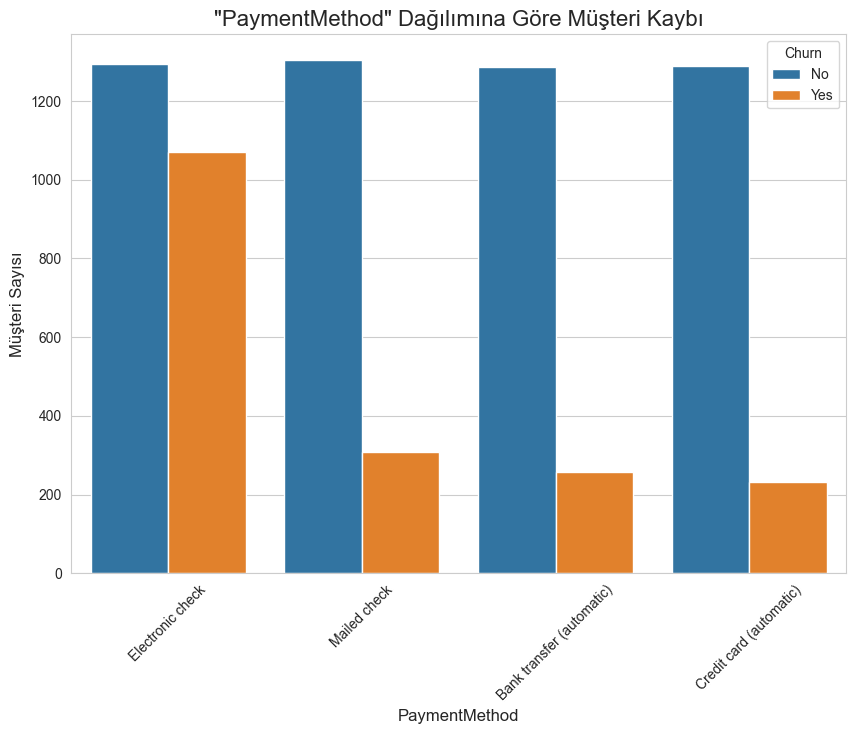

In [9]:
# Analiz etmek istediğimiz kategorik (metin tabanlı) sütunların bir listesini oluşturalım.
# 'customerID' gibi benzersiz ve anlamsız sütunları hariç tutuyoruz.
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Bu listedeki her bir özellik (feature) için bir döngü başlatalım.
for feature in categorical_features:
    # Her grafik için yeni bir çizim alanı oluşturalım.
    plt.figure(figsize=(10, 7))

    # countplot fonksiyonunu bu sefer 'hue' parametresiyle kullanıyoruz.
    # 'hue="Churn"', x eksenindeki her kategori için çubukları 'Churn' değerlerine ('Yes' ve 'No') göre ayırır.
    sns.countplot(data=df, x=feature, hue='Churn')

    # Başlığa hangi özelliğin grafiği olduğunu ekleyen dinamik bir başlık koyalım.
    plt.title(f'"{feature}" Dağılımına Göre Müşteri Kaybı', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Müşteri Sayısı', fontsize=12)

    # X eksenindeki etiketler uzunsa, okunurluğu artırmak için onları 45 derece döndürelim.
    plt.xticks(rotation=45)

    # Grafiği gösterelim.
    plt.show()

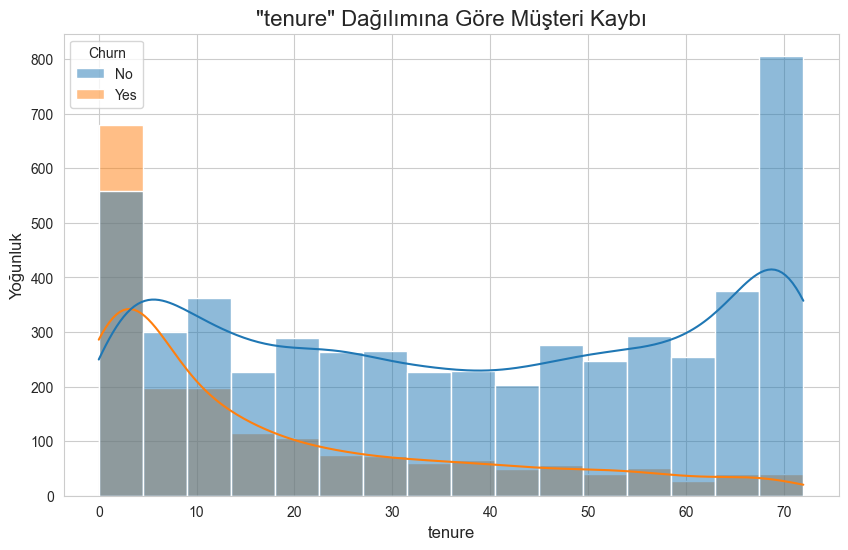

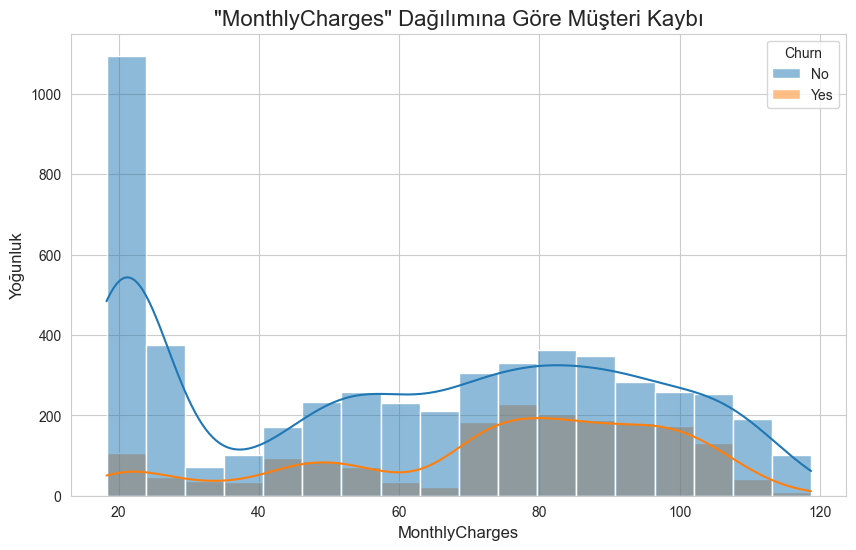

In [10]:
# Sayısal özelliklerimizi bir listeye alalım.
# 'TotalCharges' sütununda eksik veriler olabileceğini 'info()' komutunda görmüştük,
# bu yüzden onu bir sonraki temizleme adımına saklayıp şimdilik analize dahil etmiyoruz.
numerical_features = ['tenure', 'MonthlyCharges']

# Sayısal listedeki her bir özellik için bir döngü başlatalım.
for feature in numerical_features:
    plt.figure(figsize=(10, 6))

    # histplot fonksiyonu, verinin dağılımını gösterir. 'hue' yine Churn'e göre renklendirme yapar.
    # kde=True, dağılımın üzerine bir yoğunluk eğrisi çizerek şekli daha net görmemizi sağlar.
    sns.histplot(data=df, x=feature, hue='Churn', kde=True)

    plt.title(f'"{feature}" Dağılımına Göre Müşteri Kaybı', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Yoğunluk', fontsize=12)
    plt.show()

In [11]:
# TotalCharges sütununda değeri sadece bir boşluk (' ') olan satırları göster
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
# pd.to_numeric fonksiyonu ile sütunu sayıya çevirmeye çalışalım.
# errors='coerce' parametresi, çeviremediği (boşluk gibi) değerleri hata vermek yerine
# NaN (Not a Number) olarak, yani 'eksik veri' olarak işaretler. Bu tam istediğimiz şey.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Şimdi bu oluşan NaN (eksik) değerleri 0 ile dolduralım.
# Çünkü 0 ay müşterimiz olan birinin toplam harcaması da 0'dır. Bu, iş mantığına en uygun yaklaşımdır.
# inplace=True, değişikliği direkt olarak df üzerinde kalıcı hale getirir.
df['TotalCharges'].fillna(0, inplace=True)

# Her şeyin yolunda gittiğini kontrol edelim. Tekrar info() komutunu çalıştıralım.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\idris\AppData\Local\Temp\ipykernel_1008\1838681399.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [13]:
# 1. Müşterinin toplam aldığı ek hizmet sayısını hesaplayalım.
# Bu, birçok 'Yes'/'No' sütununu tek bir anlamlı sayıda birleştirir.
ek_hizmetler = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['EkHizmetSayisi'] = df[ek_hizmetler].apply(lambda x: (x == 'Yes').sum(), axis=1)

# 2. SeniorCitizen sütunu 0 ve 1'lerden oluşuyor. Bunu daha anlaşılır hale getirelim.
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# 3. Müşterinin fatura yükünü daha iyi anlamak için yeni bir oran oluşturalım.
# Aylık ücretin, toplam harcamalara oranı ne kadar?
# Paydada 0 olmasını engellemek için küçük bir sayı (epsilon) ekliyoruz.
df['AylikFaturaOrani'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1e-6)

# Oluşturduğumuz yeni özellikleri görmek için tablonun başına tekrar bakalım.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,EkHizmetSayisi,AylikFaturaOrani
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,1.000000
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2,0.030140
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2,0.497920
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3,0.022980
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0.466205


In [14]:
# Churn sütununu 1 ve 0'a dönüştürelim.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [15]:
# customerID bizim için bir özellik değil, sadece bir kimlik numarasıdır. Onu analizden çıkaralım.
df_processed = df.drop('customerID', axis=1)

# get_dummies fonksiyonu, metin içeren tüm sütunları bulur ve onları 0/1'lerden oluşan yeni sütunlara çevirir.
# drop_first=True, her kategoriden bir tanesini atarak gereksiz tekrarı önler. Bu, modellerde teknik bir problemi (multicollinearity) engeller.
df_processed = pd.get_dummies(df_processed, drop_first=True)

# Dönüşüm sonrası veri setimizin nasıl göründüğüne bakalım.
print("Dönüşüm Sonrası Sütun Sayısı:", df_processed.shape[1])
df_processed.head()

Dönüşüm Sonrası Sütun Sayısı: 33


,tenure,MonthlyCharges,TotalCharges,Churn,EkHizmetSayisi,AylikFaturaOrani,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,1.000000,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,2,0.030140,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,2,0.497920,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,3,0.022980,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,0,0.466205,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [16]:
from sklearn.model_selection import train_test_split

# X: Hedef değişkenimiz ('Churn') dışındaki tüm özellikler.
X = df_processed.drop('Churn', axis=1)

# y: Sadece hedef değişkenimiz ('Churn').
y = df_processed['Churn']

# Veriyi eğitim ve test setlerine ayıralım.
# test_size=0.2: Verinin %20'si test, %80'i eğitim için ayrılsın.
# random_state=42: Deneyi her tekrarladığımızda aynı sonuçları alabilmek için rastgeleliği sabitliyoruz.
# stratify=y: BU ÇOK ÖNEMLİ! Eğitim ve test setlerindeki Churn oranlarının (1 ve 0 dağılımının)
# orijinal veri setindekiyle aynı olmasını garanti eder. Dengesiz verilerde bu bir zorunluluktur.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ayırma işleminin başarılı olduğunu kontrol edelim.
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)
print("Eğitim setindeki Churn oranı:\n", y_train.value_counts(normalize=True))
print("\nTest setindeki Churn oranı:\n", y_test.value_counts(normalize=True))

Eğitim seti boyutu: (5634, 32)
Test seti boyutu: (1409, 32)
Eğitim setindeki Churn oranı:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Test setindeki Churn oranı:
 Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [17]:
# Gerekli tüm kütüphaneleri ve modülleri sklearn'den içeri aktaralım
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Pipeline'ımızı oluşturuyoruz. Bu, adımları bir zincir gibi birbirine bağlar.
# Adım 1: 'scaler' -> StandardScaler() ile veriyi ölçeklendir.
# Adım 2: 'classifier' -> LogisticRegression() ile sınıflandırma yap.
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000)) 
    # max_iter=1000: Modelin en iyi çözümü bulmak için yeterli deneme yapmasını sağlar.
])

# Şimdi bu pipeline'ı EĞİTİM verilerimizle eğitiyoruz.
# .fit() komutu, önce scaler'ı X_train üzerinde eğitip X_train'i dönüştürür,
# sonra dönüştürülmüş X_train ve y_train ile modeli eğitir. Hepsi tek komutta!
pipeline_lr.fit(X_train, y_train)

# Eğitilmiş pipeline'ımızı kullanarak TEST verimiz üzerinde tahminler yapalım.
y_pred_lr = pipeline_lr.predict(X_test)

# Olasılık tahminlerini de alalım (AUC-ROC skoru için gereklidir).
# [:, 1] ifadesi, '1' sınıfına (yani 'Churn=Yes') ait olma olasılıklarını seçer.
y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]

# Performans metriklerini hesaplayıp ekrana yazdıralım.
print("===== Lojistik Regresyon (Baseline Model) Performansı =====")
print(f"Accuracy (Doğruluk): {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision (Kesinlik): {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall (Duyarlılık/Yakalamak): {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score (Denge Skoru): {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC Skoru: {roc_auc_score(y_test, y_proba_lr):.4f}")

===== Lojistik Regresyon (Baseline Model) Performansı =====
Accuracy (Doğruluk): 0.8070
Precision (Kesinlik): 0.6594
Recall (Duyarlılık/Yakalamak): 0.5642
F1-Score (Denge Skoru): 0.6081
AUC-ROC Skoru: 0.8422


In [18]:
import xgboost as xgb

# Sınıf dengesizliği için bir ağırlık hesaplayalım. Bu, XGBoost'a azınlık sınıfına
# (Churn=Yes) daha fazla önem vermesini söyleyecek.
# Ağırlık = (Çoğunluk Sınıfı Sayısı) / (Azınlık Sınıfı Sayısı)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Dengesizlik Ağırlığı (scale_pos_weight): {scale_pos_weight:.2f}\n")

# XGBoost modelini oluşturalım.
# Not: Ağaç tabanlı modeller (XGBoost gibi) özellik ölçeklendirmeye ihtiyaç duymazlar.
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',  # İkili sınıflandırma problemi olduğunu belirtir.
    use_label_encoder=False,      # Deprecated bir uyarıyı önler.
    eval_metric='logloss',        # Değerlendirme metriği.
    random_state=42,              # Tekrarlanabilirlik için.
    scale_pos_weight=scale_pos_weight # İşte sihirli parametre!
)

# Modeli doğrudan eğitim verileriyle eğitelim.
model_xgb.fit(X_train, y_train)

# Test verisi üzerinde tahminler yapalım.
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Performansı değerlendirelim.
print("===== XGBoost (Gelişmiş Model) Performansı =====")
print(f"Accuracy (Doğruluk): {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision (Kesinlik): {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall (Duyarlılık/Yakalamak): {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score (Denge Skoru): {f1_score(y_test, y_pred_xgb):.4f}")
print(f"AUC-ROC Skoru: {roc_auc_score(y_test, y_proba_xgb):.4f}")

Dengesizlik Ağırlığı (scale_pos_weight): 2.77

===== XGBoost (Gelişmiş Model) Performansı =====
Accuracy (Doğruluk): 0.7537
Precision (Kesinlik): 0.5282
Recall (Duyarlılık/Yakalamak): 0.6765
F1-Score (Denge Skoru): 0.5932
AUC-ROC Skoru: 0.8146


C:\Users\idris\Documents\telco-churn-prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:27:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
# Sonuçları bir pandas DataFrame'inde toplayalım
results = {
    'Model': ['Lojistik Regresyon (Baseline)', 'XGBoost (Gelişmiş)'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_xgb)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_xgb)],
    'AUC-ROC': [roc_auc_score(y_test, y_proba_lr), roc_auc_score(y_test, y_proba_xgb)]
}

results_df = pd.DataFrame(results).set_index('Model')

# Ondalıkları düzenleyerek daha okunaklı hale getirelim
results_df.style.format("{:.4f}")

,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Model,,,,,
Lojistik Regresyon (Baseline),0.8070,0.6594,0.5642,0.6081,0.8422
XGBoost (Gelişmiş),0.7537,0.5282,0.6765,0.5932,0.8146


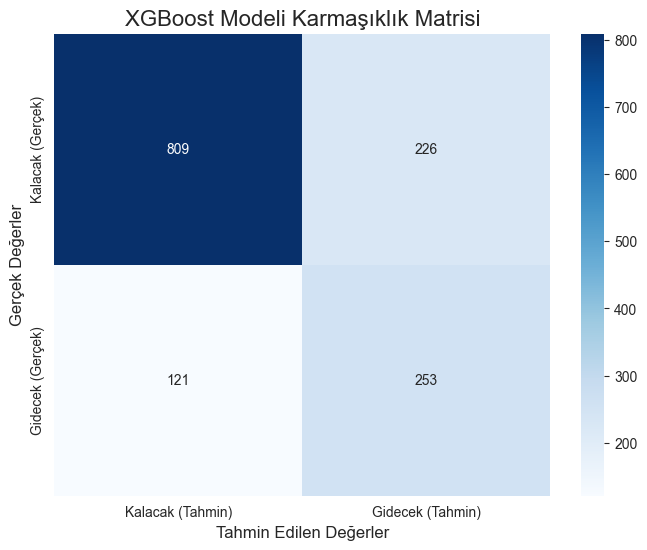

In [20]:
from sklearn.metrics import confusion_matrix

# XGBoost modeli için karmaşıklık matrisini oluşturalım
cm = confusion_matrix(y_test, y_pred_xgb)

# Bu matrisi daha anlaşılır bir şekilde görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Kalacak (Tahmin)', 'Gidecek (Tahmin)'], 
            yticklabels=['Kalacak (Gerçek)', 'Gidecek (Gerçek)'])

plt.title('XGBoost Modeli Karmaşıklık Matrisi', fontsize=16)
plt.ylabel('Gerçek Değerler', fontsize=12)
plt.xlabel('Tahmin Edilen Değerler', fontsize=12)
plt.show()

C:\Users\idris\AppData\Local\Temp\ipykernel_1008\875535257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(20), palette='viridis')


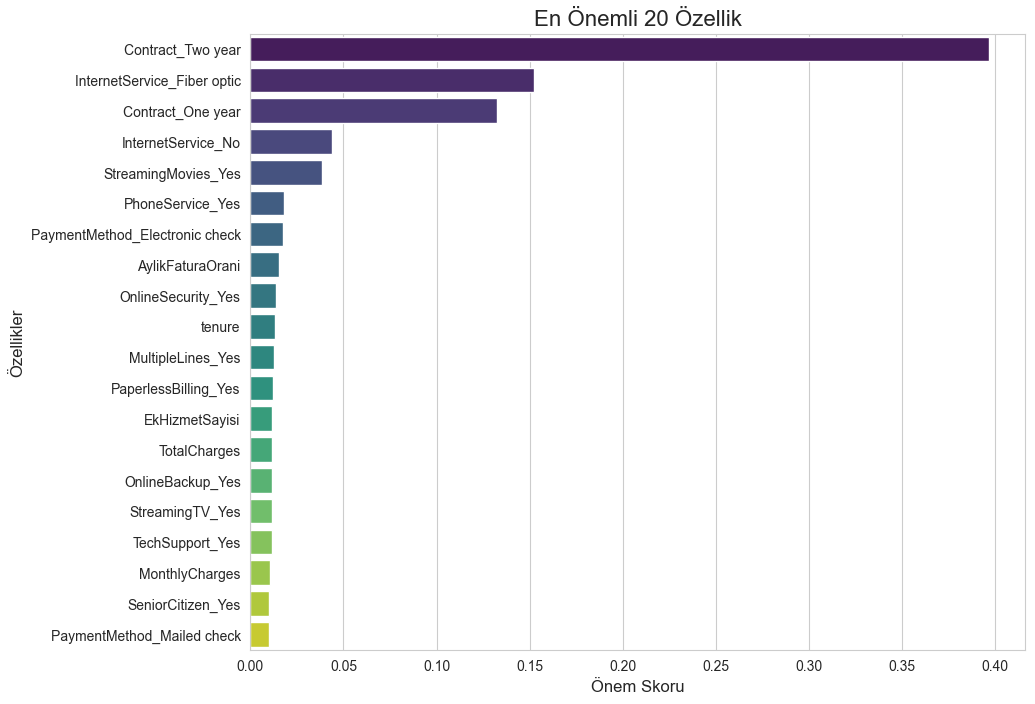

In [21]:
# Modelin özellik önem skorlarını bir DataFrame'e aktaralım
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_xgb.feature_importances_
}).sort_values('importance', ascending=False)

# Sadece en önemli 20 özelliği görselleştirelim
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20), palette='viridis')
plt.title('En Önemli 20 Özellik', fontsize=16)
plt.xlabel('Önem Skoru', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.show()

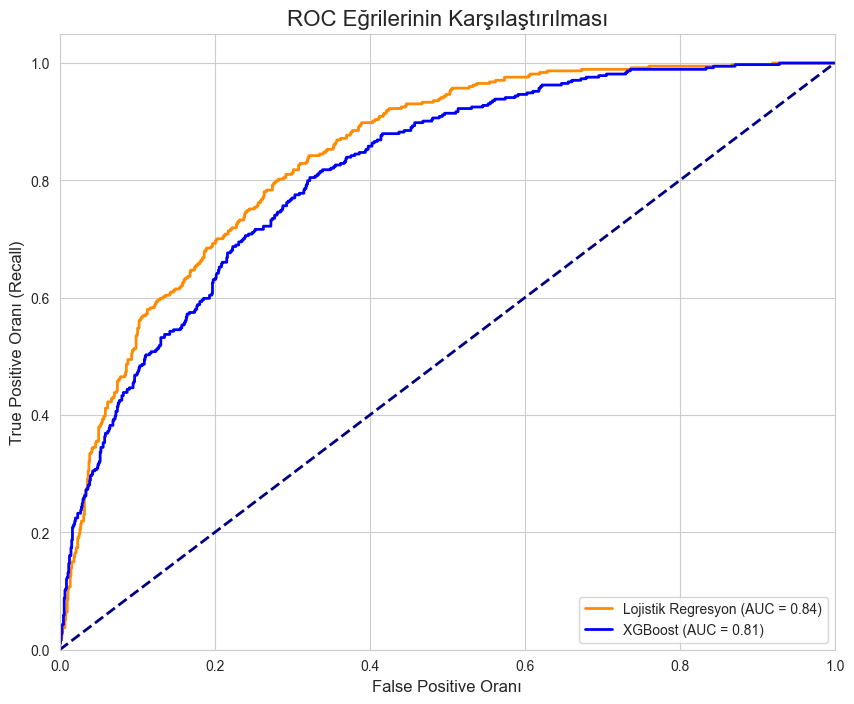

In [23]:
from sklearn.metrics import roc_curve, auc

# Lojistik Regresyon ve XGBoost için ROC eğrisi verilerini hesaplayalım
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# AUC skorlarını da alalım
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Grafiği çizdirelim
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Lojistik Regresyon (AUC = {auc_lr:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Rastgele tahmin çizgisi

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı', fontsize=12)
plt.ylabel('True Positive Oranı (Recall)', fontsize=12)
plt.title('ROC Eğrilerinin Karşılaştırılması', fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [24]:
import joblib
import json

# 1. Şampiyon XGBoost modelimizi 'models' klasörüne kaydedelim.
# joblib, özellikle numpy dizileri içeren sklearn modellerini kaydetmek için daha verimlidir.
model_filename = '../models/churn_model_v1.joblib'
joblib.dump(model_xgb, model_filename)

# 2. Modelin eğitildiği sütunların listesini kaydedelim.
# BU ADIM HAYATİ ÖNEMDEDİR! Yeni bir tahmin yapacağımız zaman,
# gelen verinin tam olarak bu sütunlara ve bu sırada sahip olduğundan emin olmalıyız.
columns_filename = '../models/model_columns.json'
model_columns = list(X_train.columns)
with open(columns_filename, 'w') as f:
    json.dump(model_columns, f)

print(f"Model '{model_filename}' olarak başarıyla kaydedildi.")
print(f"Sütun listesi '{columns_filename}' olarak başarıyla kaydedildi.")

Model '../models/churn_model_v1.joblib' olarak başarıyla kaydedildi.
Sütun listesi '../models/model_columns.json' olarak başarıyla kaydedildi.
